Here I will give an example of finding color name for the imported image. For this purpose it is better use very simple figure, not too big, also composed of simple set of colors, not too many. I will limit to the matplotlib functions only. It is sufficient for the task.

In [1]:
# import plt for plotting data 
import matplotlib.pyplot as plt
# import two other packages for image import and calling list of predefined colors.
import matplotlib.image as mpimg, matplotlib.colors as mc


In [2]:
#as I said above, we need something simple and colorful, for instance national flag.
#I uploaded in my GitHub flags of Belgium and Luxemburg. Here I take flag of Belgium
pic='Flag_of_Belgium.png'
dr="/Users/leonid/Documents/Py_scripts/matplotlib/colors/figures/"
img=mpimg.imread(dr+pic, format="png")

In [2]:
#you can also read the source file from my GitHub directory
#in this case you have to add "?raw=True" to the end of the file name
pic="https://github.com/LeonidBystrykh/course-python-for-beginners/blob/master/.github/workflows/Flag_of_Belgium.png?raw=True"
img=mpimg.imread(pic, format="png")

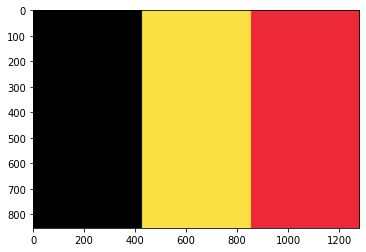

In [3]:
#There is an advantage of plotting image in the plt
#You can see immediately approximate width and height of the picture
imgplot=plt.imshow(img)
#plt.axis("off") #put scales off if you don't want it


In [4]:
#but you can explicitly ask for width, height, and total number of pixels
print('image shape: hight, width, pixels\n', img.shape)
print('total pixels', img.size)

image shape: hight, width, pixels
 (853, 1280, 4)
total pixels 4367360


In [5]:
#now for all pixels in the picture we make a list of all of them
pix=[]
for i in range(835):
    for j in range(1280):
        pix.append(list(img[i][j]))
print("Collected pixels", len(pix))

Collected pixels 1068800


In [6]:
#so, we have a bit more than a million of data points in our list
# lets collect unique colors and count them
colors, counts=[],[]
for item in pix:
    if item not in colors:
        colors.append(item)
        counts.append(1)
    else:
        counts[colors.index(item)]+=1
#Print them to check how many colors in total
#expect 3 major colors
for i in range(len(colors)):
    print(i, colors[i],counts[i])

0 [0.0, 0.0, 0.0, 1.0] 355710
1 [0.32156864, 0.2901961, 0.08627451, 1.0] 835
2 [0.98039216, 0.8784314, 0.25882354, 1.0] 355710
3 [0.94509804, 0.4, 0.23529412, 1.0] 835
4 [0.92941177, 0.16078432, 0.22352941, 1.0] 355710


The trick worked well. We collected all unique colors from the flag and counted them. This flag (and picture) are trivial in size and configuration, but in more complicated cases it might be important to generate some plot which would quantify all the colors. Below are two ways of plotting that quantitative results. One is a bubble plot, another on is a bar chart.

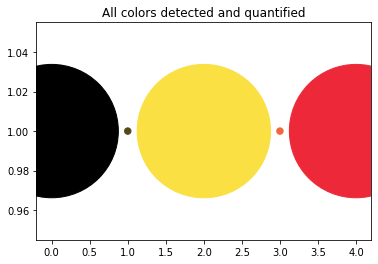

In [7]:
plt.title("All colors detected and quantified")
#use simple range of integers for x- axis
#show dots sizes proportional to the pixels found for each color
plt.scatter(range(5),[1]*5, c=colors, s=[x/20 for x in counts]);

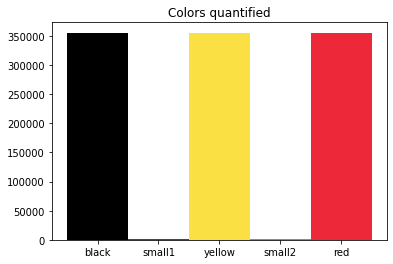

In [8]:
#the same story, now in form of a bar chart.
#note I made small-1 and small-2 colors separately. 
#check how the bar chart will look like if i would use identical name for those minor colors
plt.bar(['black','small1','yellow','small2','red'],counts, color=colors, width=1)
plt.title("Colors quantified");

That's all nice quantifications. But what are those colors exactly?
There is a little doubt that black color is truly black and its nabe is "black". Black color in RGB =(0,0,0). Note, the 4th integer in colors. It is transparency. 1 is for untransparent, 0 is for fully transparent (and therefore invisible). 
Anyway, in order to find the colors of the belgian flag we import matplotlib collection of colors.

In [9]:
#first import all names and make list of rgb colors
#On the way we have to make rgb colors from hexadecimal, which are already present in matplotlib
#we use here matplotlib.colors.to_rgb() function
rgb, hexa, names=[],[],[]
print('Colors in matplotlib')
for name in mc.cnames.items():
    print(name, mc.to_rgb(name[1]))
    rgb.append(mc.to_rgb(name[1]))
 #   if name not in colors:
    names.append(name[0])
    hexa.append(name[1])

Colors in matplotlib
('aliceblue', '#F0F8FF') (0.9411764705882353, 0.9725490196078431, 1.0)
('antiquewhite', '#FAEBD7') (0.9803921568627451, 0.9215686274509803, 0.8431372549019608)
('aqua', '#00FFFF') (0.0, 1.0, 1.0)
('aquamarine', '#7FFFD4') (0.4980392156862745, 1.0, 0.8313725490196079)
('azure', '#F0FFFF') (0.9411764705882353, 1.0, 1.0)
('beige', '#F5F5DC') (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)
('bisque', '#FFE4C4') (1.0, 0.8941176470588236, 0.7686274509803922)
('black', '#000000') (0.0, 0.0, 0.0)
('blanchedalmond', '#FFEBCD') (1.0, 0.9215686274509803, 0.803921568627451)
('blue', '#0000FF') (0.0, 0.0, 1.0)
('blueviolet', '#8A2BE2') (0.5411764705882353, 0.16862745098039217, 0.8862745098039215)
('brown', '#A52A2A') (0.6470588235294118, 0.16470588235294117, 0.16470588235294117)
('burlywood', '#DEB887') (0.8705882352941177, 0.7215686274509804, 0.5294117647058824)
('cadetblue', '#5F9EA0') (0.37254901960784315, 0.6196078431372549, 0.6274509803921569)
('chartreuse', '

In [10]:
#That worked. Now we need to know to what color our flag colors are the most similar.
#for this we calculate delta parameter, which is the difference between preset named colors in the matplotlib and
#our found colors from the picture. The color with the minimal difference will be our name
#we run it for all 5 colors in one loop
for flag_color in colors:
    deltas=[]
    for ref_color in rgb:
        #calculate delta value which will tell us which color is the most similar to our picture colors
        delta=abs(flag_color[0]-ref_color[0])+\
            abs(flag_color[1]-ref_color[1])+\
                abs(flag_color[2]-ref_color[2])
        deltas.append(delta)
    #here we find the name via index of the min(deltas)
    ID=deltas.index(min(deltas))
    #and finally print that names
    print(names[ID], '\t',counts[colors.index(flag_color)])

black 	 355710
darkolivegreen 	 835
gold 	 355710
tomato 	 835
crimson 	 355710


So, it appears that 3 major colors of the Belgian flag are "black", "gold" and "crimson", not "black", "yellow" and "red" as someone would think otherwise.